In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
PUKE_CNT = 13
seed = 10000
random.seed(seed)

In [4]:
color = [(random.random(), random.random(), random.random()) for i in range(PUKE_CNT+1)]

In [5]:
DesktopPs = list(range(1, 14))
DesktopPs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [6]:
def show_puke(puke, color):
    container = plt.bar(list(map(str, puke)), height=puke, color=[color[v] for v in puke])
    for patch in container.patches:
        plt.text(patch.get_x() + patch.get_width() / 4, -1, patch.get_height(), fontsize=10,
                 fontweight='bold')
        plt.text(patch.get_x() + patch.get_width() / 4, patch.get_height() + 0.2, patch.get_height(), fontsize=10,
                 fontweight='bold')
    plt.axis('off')
    plt.show()

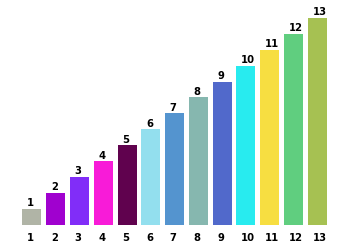

In [7]:
show_puke(DesktopPs, color=color)

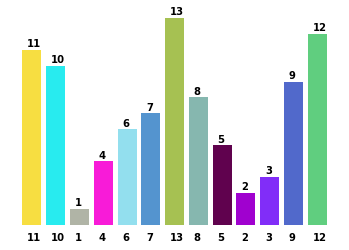

In [8]:
random.shuffle(DesktopPs)
show_puke(DesktopPs, color=color)

### 初始状态

In [9]:
DesktopPs

[11, 10, 1, 4, 6, 7, 13, 8, 5, 2, 3, 9, 12]

In [10]:
LeftHandPs = []
RightHandP = None

### 插牌

In [11]:
def insert(RightHandP, LeftHandPs):
    if len(LeftHandPs) == 0:
        LeftHandPs.append(RightHandP)
        return

    old_length = len(LeftHandPs)
    LeftHandPs.append(RightHandP)
    for j in range(old_length-1, -1, -1):
        if LeftHandPs[j] > RightHandP:
            LeftHandPs[j+1] = LeftHandPs[j]
            LeftHandPs[j] = RightHandP
            continue
        break


In [12]:
def insert2(RightHandP, LeftHandPs):
    if len(LeftHandPs) == 0:
        LeftHandPs.append(RightHandP)
        return

    bfind = False
    for pos in range(len(LeftHandPs)):
        if LeftHandPs[pos] > RightHandP:
            bfind = True
            break

    if not bfind:
        LeftHandPs.append(RightHandP)
        return
    LeftHandPs.append(None)
    LeftHandPs[pos+1:] = LeftHandPs[pos:-1]
    LeftHandPs[pos] = RightHandP


### 起牌

In [13]:
while len(DesktopPs) != 0:
    RightHandP = DesktopPs[-1]
    DesktopPs.pop()

    insert2(RightHandP, LeftHandPs)


### 输出结果

In [14]:
LeftHandPs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

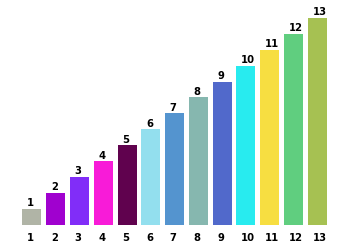

In [15]:
show_puke(LeftHandPs, color=color)